<a href="https://colab.research.google.com/github/alexdlilly/GDP-Life-Expectency---Codecademy/blob/main/Life_Expectancy_and_GDP_Codecademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [7]:
Countries = data.Country.unique()
print(Countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Make line plots of life expectancy at birth for each country

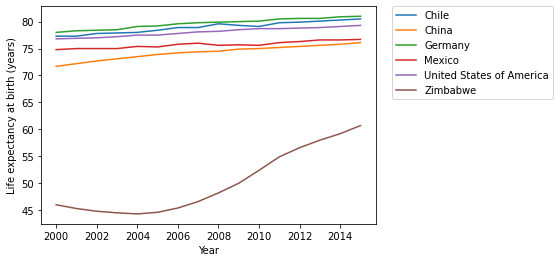

In [8]:
sns.lineplot(data = data, x = 'Year',y = 'Life expectancy at birth (years)', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Make a line plot of GDP over time for each country

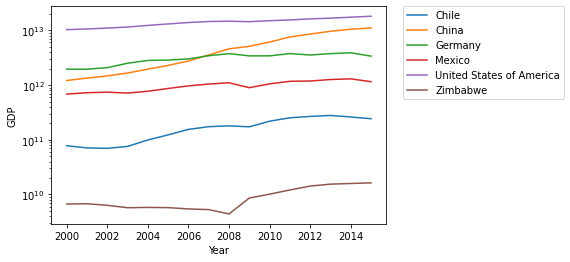

In [54]:
ax = plt.subplot()
sns.lineplot(data = data, x = 'Year',y = 'GDP', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(yscale = 'log')
plt.show()

The interesting thing here is that the only order change across these 14 years is China, overtaking the GDP of Germany in 2007. 

Find a way to normalize GDP growth and plot GDP Growth over time. 

In [17]:
US_Data = data[data.Country == 'United States of America'].reset_index()
Z_Data = data[data.Country == 'Zimbabwe'].reset_index()
Chile_Data = data[data.Country == 'Chile'].reset_index()
China_Data = data[data.Country == 'China'].reset_index()
Germany_Data = data[data.Country == 'Germany'].reset_index()
Mexico_Data = data[data.Country == 'Mexico'].reset_index() 

In [59]:
def norm_GDP(df):
  data = df.GDP.values.tolist()
  norm_data = []
  for i in range(len(data)):
    if i == 0:
      norm_data.append(0)
    elif i == len(data)-1:
      norm_data.append(norm_data[i-1])
      df['Norm_GDP'] = norm_data
      return df
    else:
      norm_data.append(((data[i+1] - data[0])/data[0]*100))

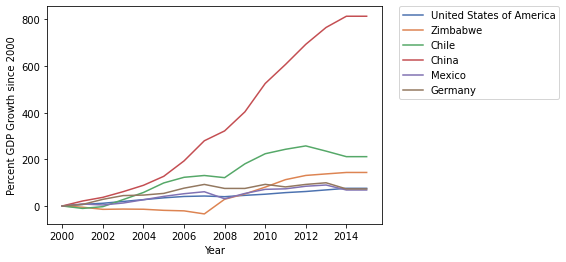

In [67]:
US_Normed = norm_GDP(US_Data)
Z_Normed = norm_GDP(Z_Data)
Chile_Normed = norm_GDP(Chile_Data)
China_Normed = norm_GDP(China_Data)
Mexico_Normed = norm_GDP(Mexico_Data)
Germany_Normed = norm_GDP(Germany_Data)

frames = [US_Normed, Z_Normed, Chile_Normed, China_Normed, Mexico_Normed, Germany_Normed]
data_new = pd.concat(frames,ignore_index=True)

ax = sns.lineplot(data = data_new, x = 'Year',y = 'Norm_GDP', hue = 'Country')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(ylabel = 'Percent GDP Growth since 2000')
sns.set_palette("deep")
plt.show()

Interesting, since 200, China's GDP has grown approximately 800 percent. The country with the next highest growth was Chile, with a roughly 200% increase over the 14 year period. 

Make a scatter plot with GDP against Life Expectancy

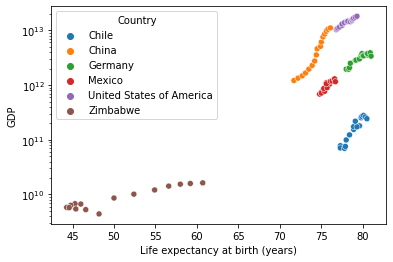

In [56]:
ax = sns.scatterplot(data = data, x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country')
ax.set(yscale = 'log')
plt.show()

Interesting! Perhaps there is a correlation between GDP and life expectancy up until a certain point. However, no matter how much the machine of capitalism produces, you won't be immortal. 